# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        print("End of set. Sleeping for 60 seconds.")
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | kerikeri
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | portales
Processing Record 7 of Set 1 | veracruz
Processing Record 8 of Set 1 | mirik
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | pimentel
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | mariental
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | yigo village
Pr

Processing Record 38 of Set 4 | al burayqah
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | cide
Processing Record 41 of Set 4 | kayangel
Processing Record 42 of Set 4 | zhanjiang
Processing Record 43 of Set 4 | kataragama
City not found. Skipping...
Processing Record 44 of Set 4 | formosa do rio preto
Processing Record 45 of Set 4 | thunder bay
Processing Record 46 of Set 4 | cangzhou
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | wa
City not found. Skipping...
Processing Record 49 of Set 4 | puerto baquerizo moreno
End of set. Sleeping for 60 seconds.
Processing Record 0 of Set 5 | adre
Processing Record 1 of Set 5 | nova sintra
Processing Record 2 of Set 5 | malakal
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | lethem
Processing Record 5 of Set 5 | qarauyl
Processing Record 6 of Set 5 | klyuchi
Processing Record 7 of Set 5 | enewetak
Processing Record 8 of Set 5 | keflavik
Processing Record 9 of Set 5 |

Processing Record 28 of Set 8 | xilin hot
Processing Record 29 of Set 8 | severo-yeniseyskiy
Processing Record 30 of Set 8 | turuntayevo
Processing Record 31 of Set 8 | mahajanga
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | selkirk
Processing Record 34 of Set 8 | alo
Processing Record 35 of Set 8 | bolobo
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | fort mcmurray
Processing Record 39 of Set 8 | porkhov
Processing Record 40 of Set 8 | porto novo
Processing Record 41 of Set 8 | taoudenni
Processing Record 42 of Set 8 | vila velha
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | kargil
Processing Record 45 of Set 8 | salalah
Processing Record 46 of Set 8 | leh
Processing Record 47 of Set 8 | grand island
Processing Record 48 of Set 8 | lincheng
Processing Record 49 of Set 8 | puerto cabezas
End of set. Sleeping for 60 seconds.
Processing Record 0 of Set 9 | dhandhuka
P

Processing Record 16 of Set 12 | paicandu
Processing Record 17 of Set 12 | yagunovskiy
Processing Record 18 of Set 12 | la grande
Processing Record 19 of Set 12 | machagai
Processing Record 20 of Set 12 | panama city beach
Processing Record 21 of Set 12 | tralee
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | aykhal
Processing Record 24 of Set 12 | yuanping
Processing Record 25 of Set 12 | jieshi
Processing Record 26 of Set 12 | annau
Processing Record 27 of Set 12 | kalmunai
Processing Record 28 of Set 12 | klaksvik
Processing Record 29 of Set 12 | terekeka
City not found. Skipping...
Processing Record 30 of Set 12 | waddan
Processing Record 31 of Set 12 | haugesund
Processing Record 32 of Set 12 | puerto aysen
Processing Record 33 of Set 12 | nellore
Processing Record 34 of Set 12 | san antonio de pale
Processing Record 35 of Set 12 | emerald
Processing Record 36 of Set 12 | chapada dos guimaraes
Processing Record 37 of Set 12 | shimoda
Processing Record 38 o

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,10.53,98,67,1.52,RU,1682872471
1,kerikeri,-35.2268,173.9474,67.91,97,86,1.01,NZ,1682872471
2,hawaiian paradise park,19.5933,-154.9731,68.90,93,75,9.22,US,1682872472
3,blackmans bay,-43.0167,147.3167,48.52,89,10,4.25,AU,1682872472
4,albany,42.6001,-73.9662,57.92,79,100,6.22,US,1682872472


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,10.53,98,67,1.52,RU,1682872471
1,kerikeri,-35.2268,173.9474,67.91,97,86,1.01,NZ,1682872471
2,hawaiian paradise park,19.5933,-154.9731,68.90,93,75,9.22,US,1682872472
3,blackmans bay,-43.0167,147.3167,48.52,89,10,4.25,AU,1682872472
4,albany,42.6001,-73.9662,57.92,79,100,6.22,US,1682872472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

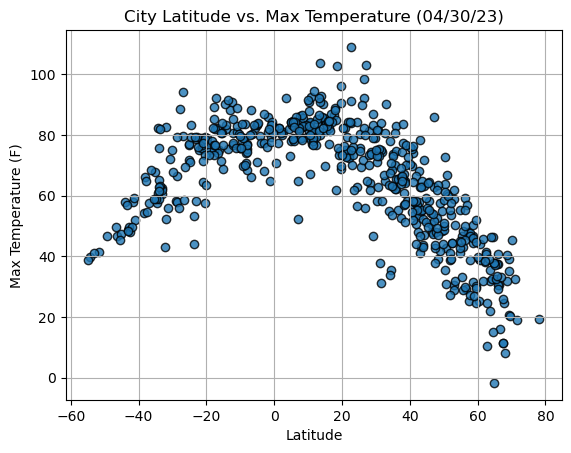

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

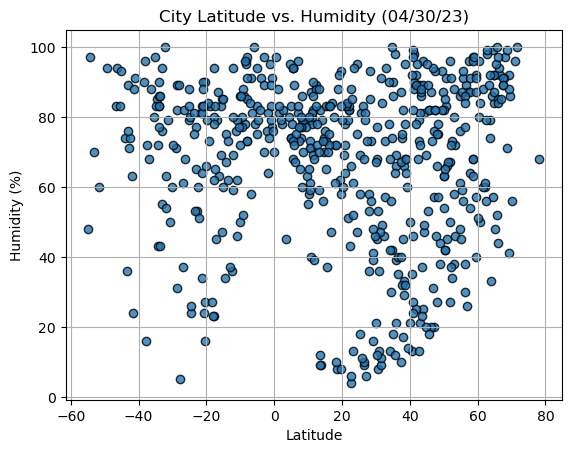

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

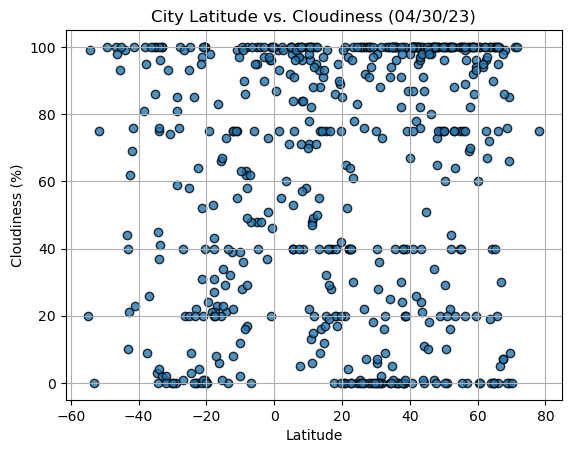

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

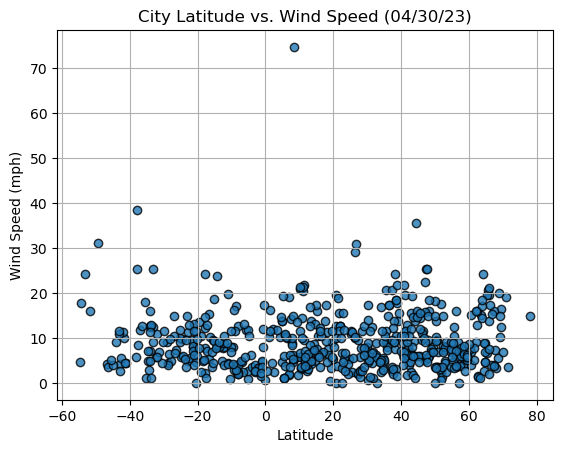

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,10.53,98,67,1.52,RU,1682872471
2,hawaiian paradise park,19.5933,-154.9731,68.90,93,75,9.22,US,1682872472
4,albany,42.6001,-73.9662,57.92,79,100,6.22,US,1682872472
5,portales,34.1862,-103.3344,78.10,13,0,16.80,US,1682872472
6,veracruz,19.3333,-96.6667,74.71,62,89,3.24,MX,1682872204


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kerikeri,-35.2268,173.9474,67.91,97,86,1.01,NZ,1682872471
3,blackmans bay,-43.0167,147.3167,48.52,89,10,4.25,AU,1682872472
12,minas de marcona,-15.2119,-75.1103,68.83,60,34,18.68,PE,1682872475
13,pimentel,-6.8367,-79.9342,88.09,58,0,4.61,PE,1682872475
14,grytviken,-54.2811,-36.5092,39.92,97,99,17.78,GS,1682872475


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7189634564338173


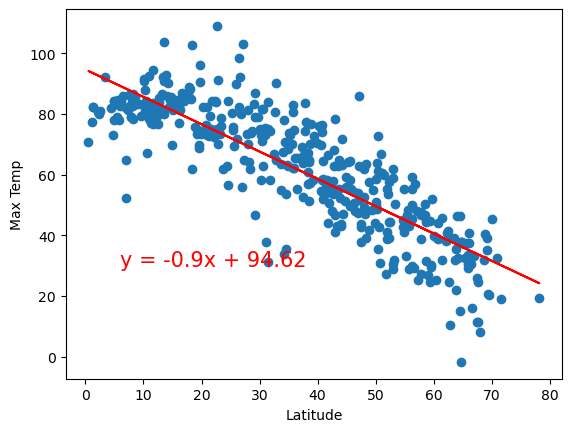

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.5549287884863275


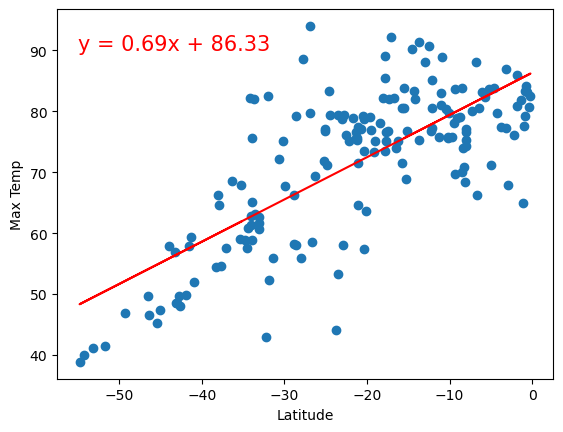

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

**Discussion about the linear relationship:** The northern Hem goes from 0 to 80 from the equator up and it goes from hot to cold and the southern hem does the opposite. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003884847810756444


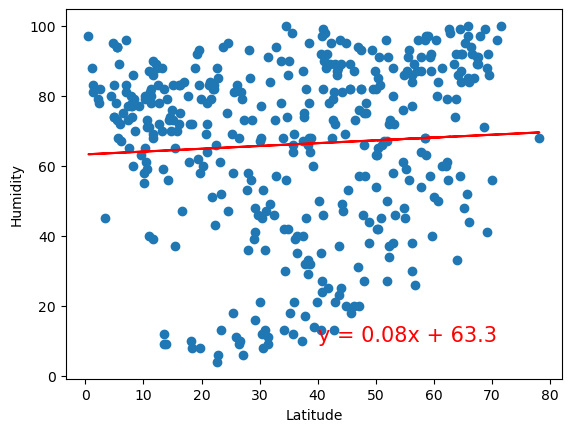

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.00873410930122138


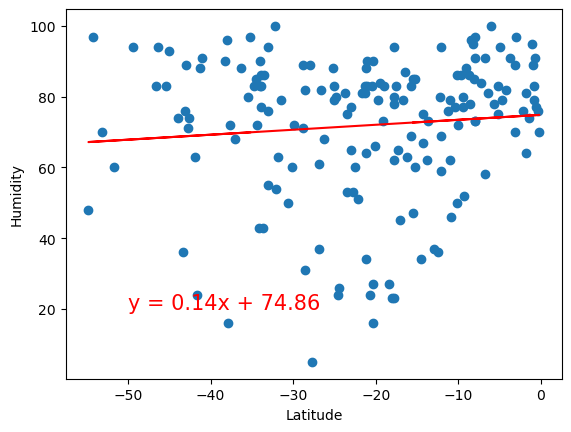

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** the line of regression is about the same for both the north and the south hem.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007975528496920145


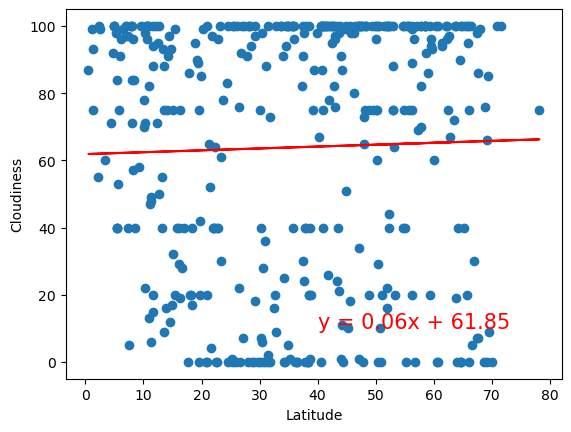

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.001317354978807658


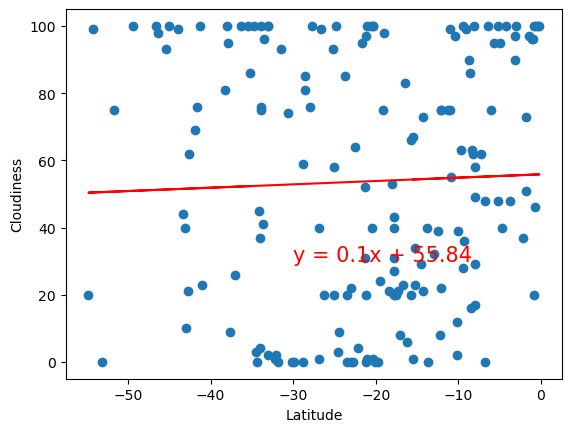

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** the north is slightly more cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 7.371021641775744e-08


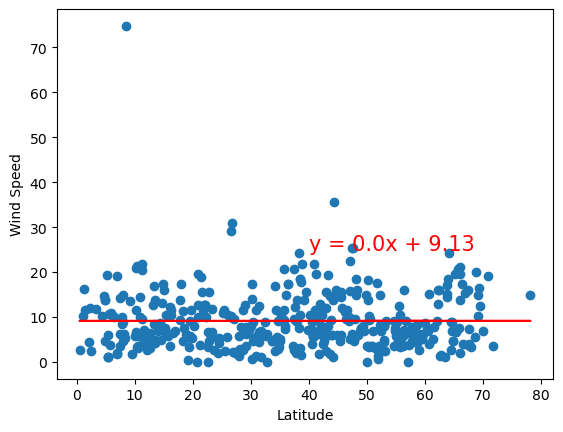

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.07601150420540519


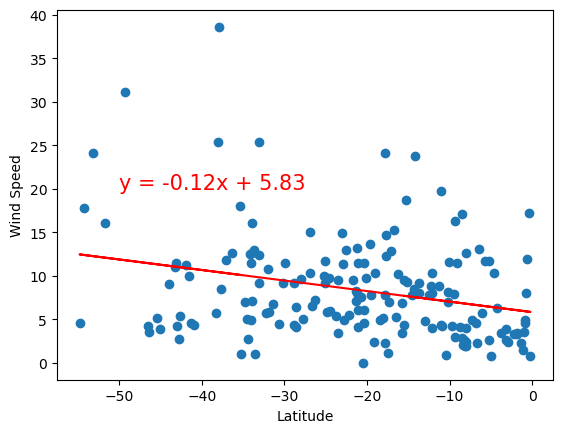

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

**Discussion about the linear relationship:** North is slightly on point with the regression but one outlier, the south has more outliers outside of the regression.